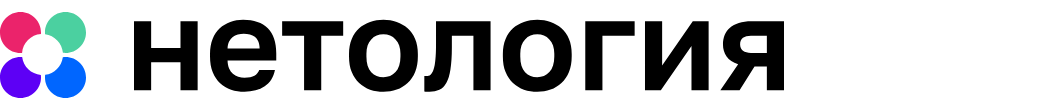

## Домашнее задание "Финальное"

Закрепляем и отрабатываем все знания, полученные на курсе! Для работы используйте набор данных по [ссылке](https://raw.githubusercontent.com/catprokhorova/HW_datasets/main/ML_3/Global%20YouTube%20Statistics.csv).

Описание датасета:
- rank: Position of the YouTube channel based on the number of subscribers
- Youtuber: Name of the YouTube channel
- subscribers: Number of subscribers to the channel
- video views: Total views across all videos on the channel
- category: Category or niche of the channel
- Title: Title of the YouTube channel
- uploads: Total number of videos uploaded on the channel
- Country: Country where the YouTube channel originates
- Abbreviation: Abbreviation of the country
- channel_type: Type of the YouTube channel (e.g., individual, brand)
- video_views_rank: Ranking of the channel based on total video views
- country_rank: Ranking of the channel based on the number of subscribers within its country
- channel_type_rank: Ranking of the channel based on its type (individual or brand)
- video_views_for_the_last_30_days: Total video views in the last 30 days
- lowest_monthly_earnings: Lowest estimated monthly earnings from the channel
- highest_monthly_earnings: Highest estimated monthly earnings from the channel
- lowest_yearly_earnings: Lowest estimated yearly earnings from the channel
- highest_yearly_earnings: Highest estimated yearly earnings from the channel
- subscribers_for_last_30_days: Number of new subscribers gained in the last 30 days
- created_year: Year when the YouTube channel was created
- created_month: Month when the YouTube channel was created
- created_date: Exact date of the YouTube channel's creation
- Gross tertiary education enrollment (%): Percentage of the population enrolled in tertiary education in the country
- Population: Total population of the country
- Unemployment rate: Unemployment rate in the country
- Urban_population: Percentage of the population living in urban areas
- Latitude: Latitude coordinate of the country's location
- Longitude: Longitude coordinate of the country's location

#### Задание 1. EDA
Проведите разведовательный анализ данных ([EDA](https://teletype.in/@pythontalk/eda_instruments)). 
1. Задайте не менее 6 вопросов к данным и постарайтесь ответить на них, используя визуализацию. 
2. Изобразите [матрицу корреляций](https://www.geeksforgeeks.org/how-to-create-a-seaborn-correlation-heatmap-in-python/) для нахождения взаимосвязей.
#### Задание 2. Корреляционный анализ
1. Оставьте два коррелирующих столбца: `"subscribers"` и `"video views"`.
2. Отфильтруйте данные - уберите те строки, где кол-во просмотров равно нулю.
3. Рассчитайте коэффициент корреляции Пирсона.
4. Определите `"video views"` как признак Х, а `"subscribers"` - как целевую переменную.
5. Разделите выботку на тестовую и тренировочную.
6. Постройте модель линейной регрессии.
7. Рассчитайте точность модели на тестовой выборке.

\* Как изменится точность, если опустить пункт 2 и не убирать из данных нулевые просмотры?
#### Задание 3. Классификация
1. Определите две самые популярные категории канала и отфильтруйте по ним набор данных.
2. В качестве признаков используйте следующие столбцы: `['video views', 'subscribers', 'uploads']`
3. Снова отфильтруйте данные - уберите те строки, где кол-во просмотров равно нулю.
4. Для целевой переменной используйте столбец `'category'`. Значения по нему закодируйте с помощью [LabelEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html).
5. Разделите выботку на тестовую и тренировочную, укажите `random_state=13`.`
6. Постройте модель логистической регрессии.
7. Рассчитайте точность модели на тестовой выборке.

\* Изменится ли точность модели, если в качестве признаков выбрать другие столбцы?

**Требования по оформлению графиков:**

У графиков должен быть заголовок, подписи осей, легенда (опционально). Каждая визуализация должным образом оформлена и может быть интерпретирована даже в отрыве от контекста.

**Важно!**

Оставляйте свои комментарии к графикам: отвечает ли визуализация на поставленный вопрос, что вы наблюдаете в данных, какие выводы можно сделать и т.д. Ход ваших мыслей так же важен, как и написанный вами код.

#### Примечание
Домашнее задание сдается ссылкой [Google Colab](https://colab.research.google.com/). Мы не сможем проверить его или помочь, если вы пришлете:

- файлы;
- архивы;
- скриншоты кода.

Все обсуждения и консультации по выполнению домашнего задания ведутся только на соответствующем канале в Discord.

**Как правильно задавать вопросы аспирантам, преподавателям и коллегам:**

Прежде чем задать вопрос, попробуйте найти ответ в интернете. Навык самостоятельного поиска информации — один из важнейших. Каждый практикующий специалист любого уровня делает это ежедневно.

Сформулируйте вопрос по алгоритму:

1) Что я делаю?
2) Какого результата я ожидаю?
3) Как фактический результат отличается от ожидаемого?
4) Что я уже попробовал сделать, чтобы исправить проблему?

По возможности прикрепите к вопросу скриншоты либо ссылки на код. Не выкладывайте все решение, оставляйте только проблемный и воспроизводимый участок кода.

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
df = pd.read_csv("Global YouTube Statistics.csv", encoding='unicode_escape')

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from numpy import NaN

In [56]:
# df = df.loc[~(df['Country'].isna())]
# df = df.loc[~(df['created_year'].isna())]
# df = df.loc[~(df['subscribers_for_last_30_days'].isna())]

In [74]:
categories_to_select = ['Entertainment', 'Music']
df2 = df[df['category'].isin(categories_to_select)]

In [75]:
X = df2[['video views','subscribers', 'uploads', 'category']]
X = X.loc[(X['video views'] > 0)]
del X['category']

In [76]:
le = LabelEncoder()
le.fit(df2['category'])
y = pd.Series(data = le.transform(df2['category']))

In [77]:
model = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(f"Точность тестовой выборки: {round(model.score(X_test, y_test) * 100)}%")

Точность тестовой выборки: 60%
